In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

C:\Users\Viraj Walanj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DF=pd.read_csv('zomato1.csv')

In [3]:
DF.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#Understanding the dataset
DF.shape

(51717, 17)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
DF.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
#Data Cleaning
#(a) Dropping unnecessary columns
DF.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [8]:
DF.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [9]:
#(b) Renaming the columns
df=DF.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City'})

In [10]:
df.sample(5)

,Name,online_order,book_table,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
36522,Natural Ice Cream,No,No,4.5 /5,942,Dessert Parlor,"Ice Cream, Beverages",200,Desserts,Koramangala 7th Block
21334,Crafted Plate,Yes,Yes,4.2 /5,240,"Casual Dining, Cafe","Cafe, Asian, Burger, Continental, Italian, Salad",600,Dine-out,Jayanagar
8167,Food Box -The Taste Of Odisha,Yes,No,NaN,0,Quick Bites,"Chinese, Oriya, Bengali, North Indian",350,Dine-out,Brookefield
17235,Wheat House,Yes,No,3.3/5,11,Quick Bites,"Kerala, South Indian, Fast Food",400,Dine-out,HSR
40987,Absolute Shawarma,Yes,No,3.8 /5,121,"Takeaway, Delivery",Lebanese,150,Delivery,Marathahalli


In [11]:
#(c) Dropping duplicate rows
sum(df.duplicated())

124

In [12]:
df=df.drop_duplicates()
df

,Name,online_order,book_table,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [13]:
#(d) Cleaning individual rows
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
df['Name'] = df['Name'].apply(lambda x: name_clean(x))

In [14]:
df.Name

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: Name, Length: 51593, dtype: object

In [15]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

In [17]:
df.isnull().sum()

Name                0
online_order        0
book_table          0
Ratings         10003
Votes               0
Rest_Type         227
Cuisines           45
Cost              344
Type                0
City                0
dtype: int64

In [18]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['Ratings']=df['Ratings'].apply(remove_5)

In [21]:
df.fillna(value=pd.np.nan, inplace=True)

C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\4114817568.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.fillna(value=pd.np.nan, inplace=True)


In [22]:
df['Ratings'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [23]:
## function to remove commas and convert the values
## into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


In [24]:
#Handling missing data

print(df.isnull().sum())
print([features for features in df.columns if df[features].isnull().sum()>0])

Name                0
online_order        0
book_table          0
Ratings         10003
Votes               0
Rest_Type         227
Cuisines           45
Cost              344
Type                0
City                0
dtype: int64
['Ratings', 'Rest_Type', 'Cuisines', 'Cost']


<AxesSubplot:>

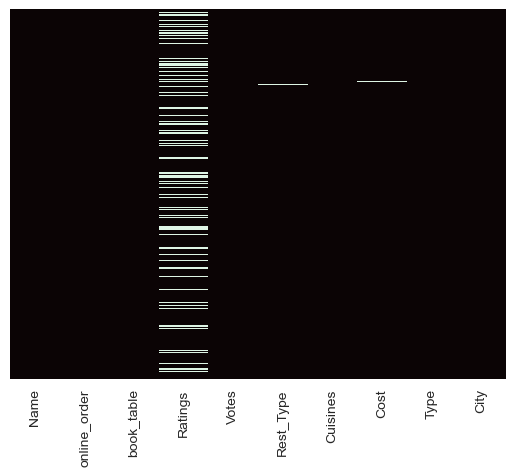

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [26]:
df=df.dropna()

In [27]:
df.shape

(41190, 10)

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Ratings"]=le.fit_transform(df['Ratings'])
df['Cost']=le.fit_transform(df['Cost'])


C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\3196293178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ratings"]=le.fit_transform(df['Ratings'])
C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\3196293178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cost']=le.fit_transform(df['Cost'])


In [29]:
df.dtypes

Name            object
online_order    object
book_table      object
Ratings          int32
Votes            int64
Rest_Type       object
Cuisines        object
Cost             int64
Type            object
City            object
dtype: object

Exploratory Data Analysis

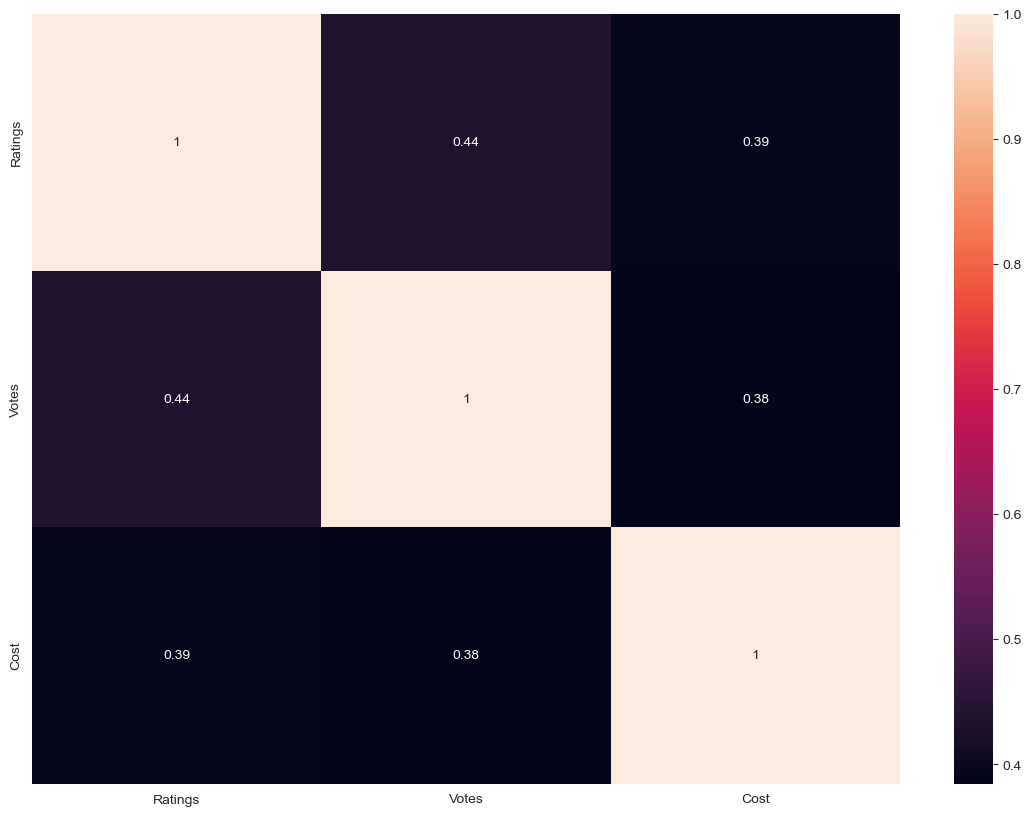

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True);

There seems to be a moderate correlation between ratings and votes, and a week correlation between cost and votes,cost and rate

In [31]:
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\2011016802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order.replace(('Yes','No'),(True, False),inplace=True)
C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\2011016802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.book_table.replace(('Yes','No'),(True, False),inplace=True)


True     27046
False    14144
Name: online_order, dtype: int64


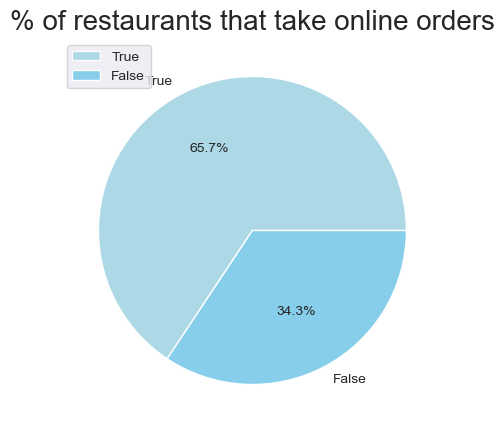

In [32]:
#How many restaurants in Bangalore take online orders?
print(df['online_order'].value_counts())
plt.figure(figsize=(10,5))
df['online_order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

False    34915
True      6275
Name: book_table, dtype: int64


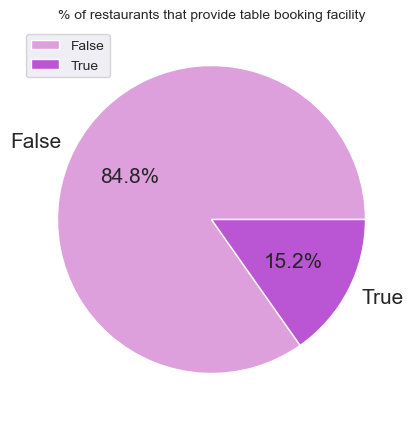

In [33]:
#What percentage of restaurants offer table booking facilities?
print(df['book_table'].value_counts())
plt.figure(figsize=(10,5))
df['book_table'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=10)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

Text(0, 0.5, 'Ratings Count')

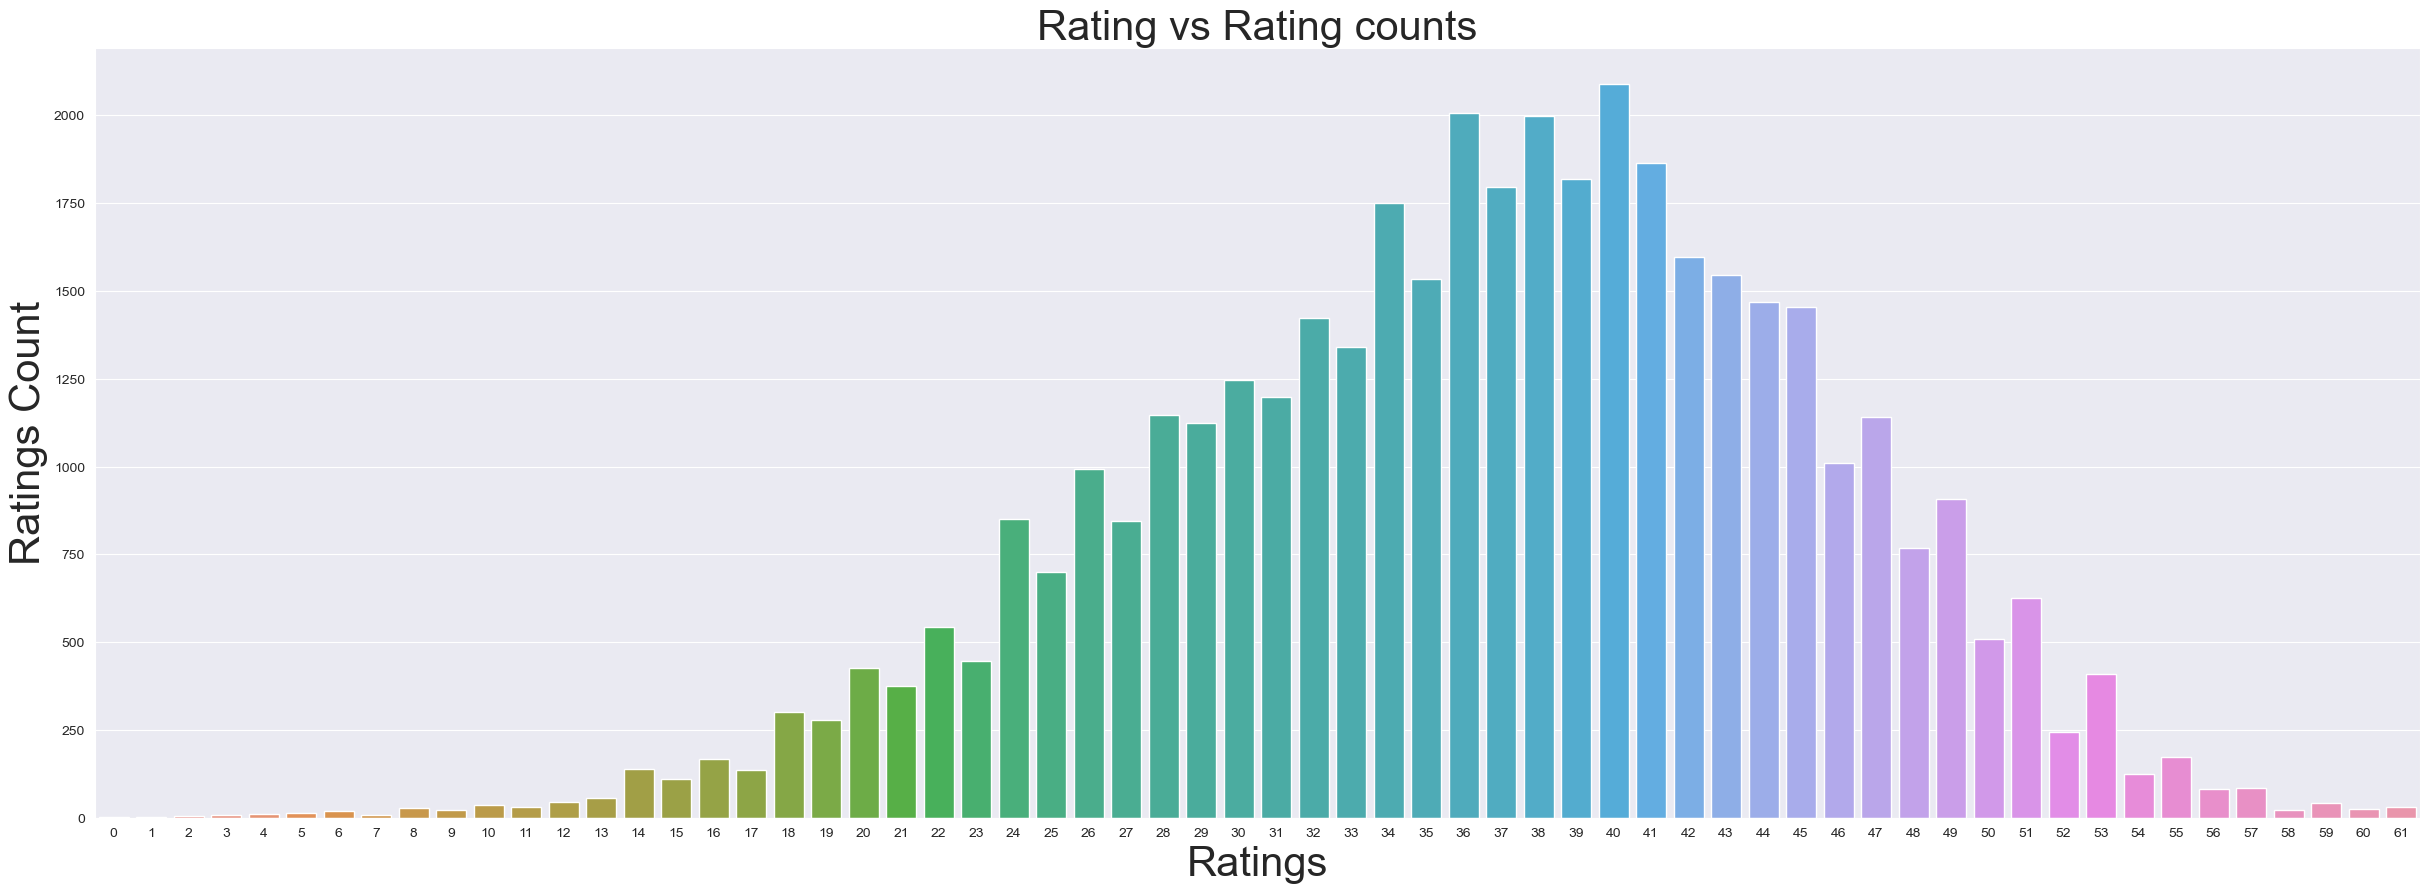

In [34]:
#What was the most common rating?
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.

C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\423693197.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -10.0, '-10'),
 Text(0, 0.0, '0'),
 Text(0, 10.0, '10'),
 Text(0, 20.0, '20'),
 Text(0, 30.0, '30'),
 Text(0, 40.0, '40'),
 Text(0, 50.0, '50'),
 Text(0, 60.0, '60'),
 Text(0, 70.0, '70')]

<Figure size 3000x1000 with 0 Axes>

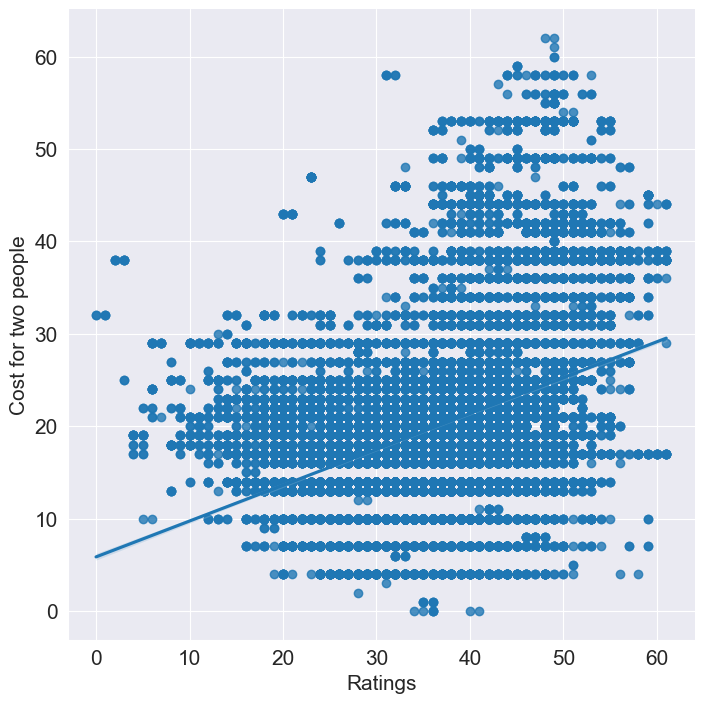

In [35]:
#Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

 restaurants that cost less have better reviews than restaurants that are expensive.

In [36]:
#Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

                     City    Ratings
21                MG Road  38.992048
27         Residency Road  38.575893
20           Lavelle Road  38.500345
18  Koramangala 6th Block  38.273585
17  Koramangala 5th Block  38.214063


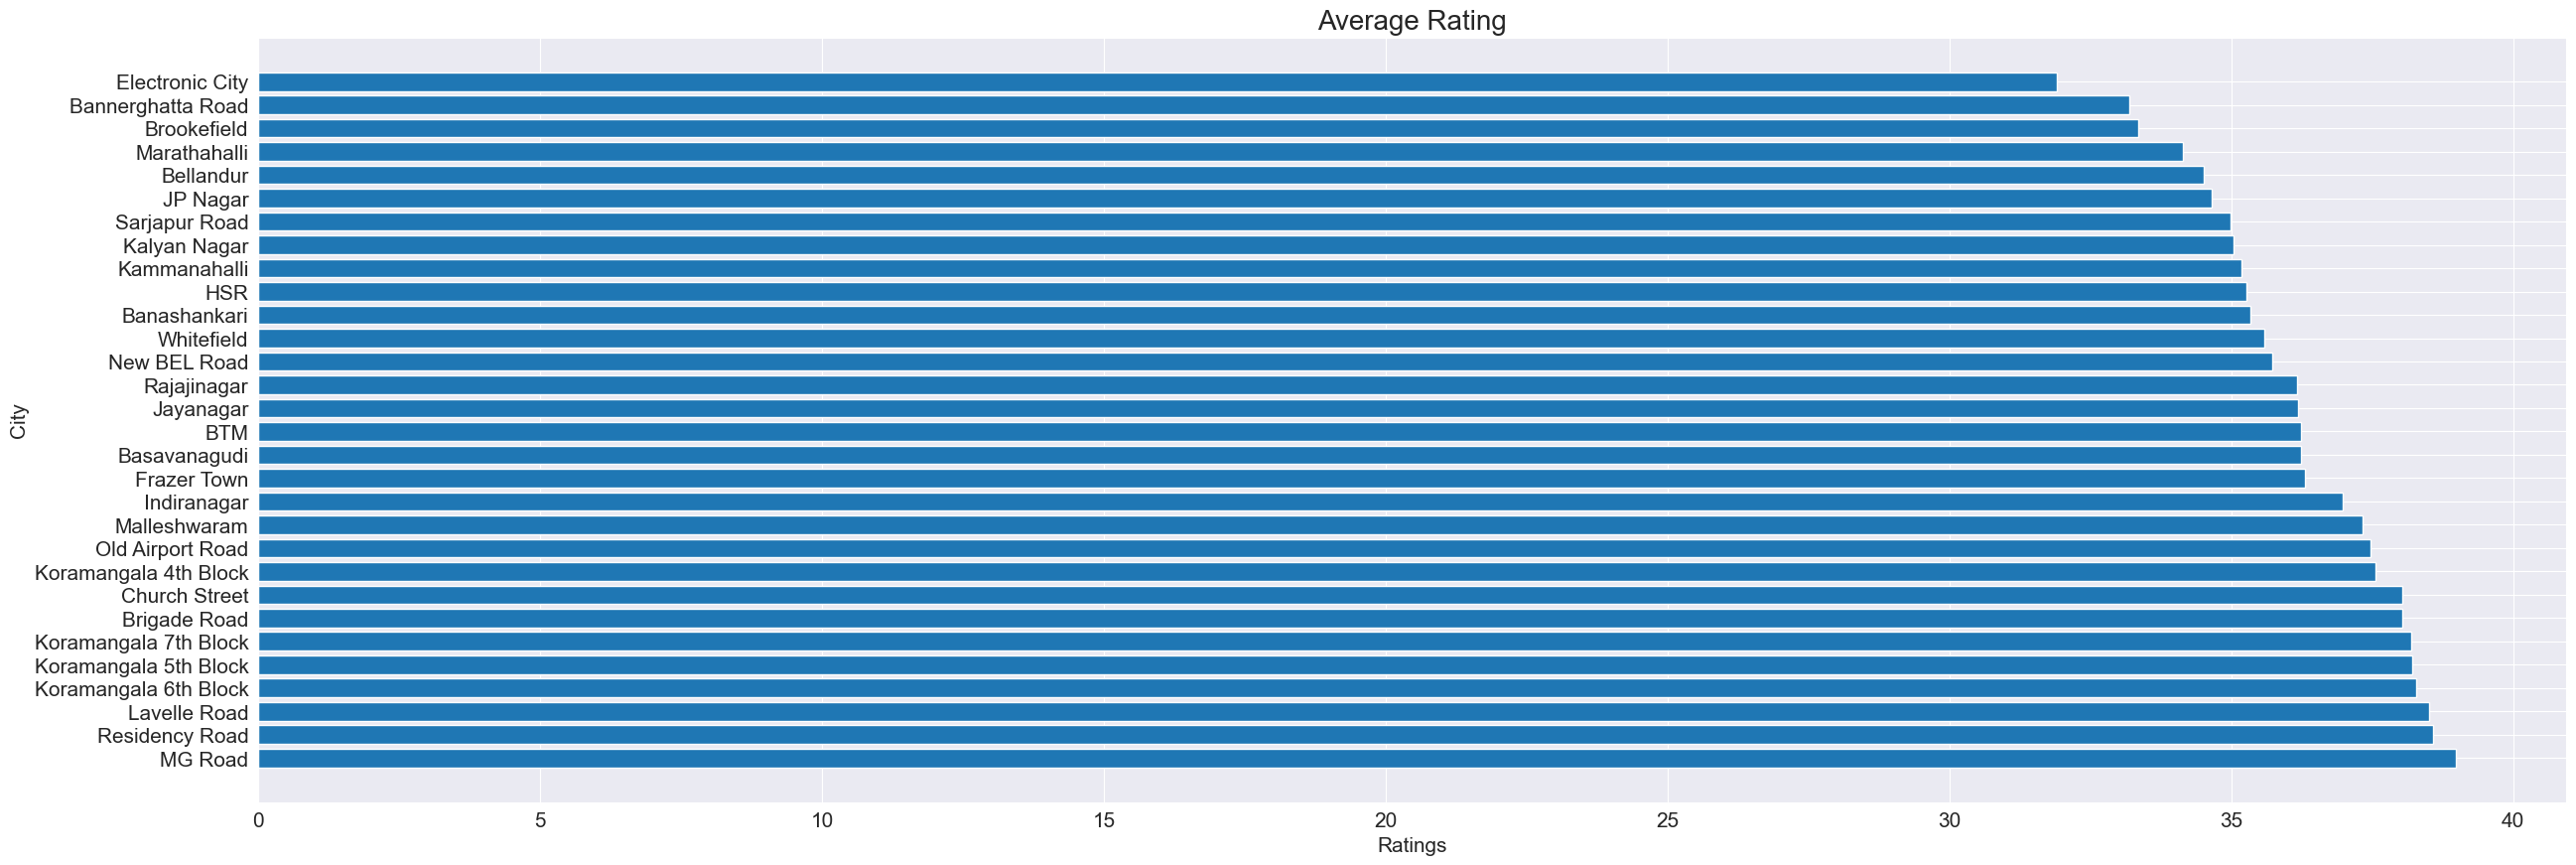

In [37]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()

High-rated restaurants are most commonly found in MG Road, while Electronic City has the lowest number of high-rated restaurants.

                 Type       Cost
3            Desserts  15.973422
2            Delivery  18.069538
4            Dine-out  20.889466
1               Cafes  21.590999
0              Buffet  33.412530
6       Pubs and bars  34.039683
5  Drinks & nightlife  35.875723


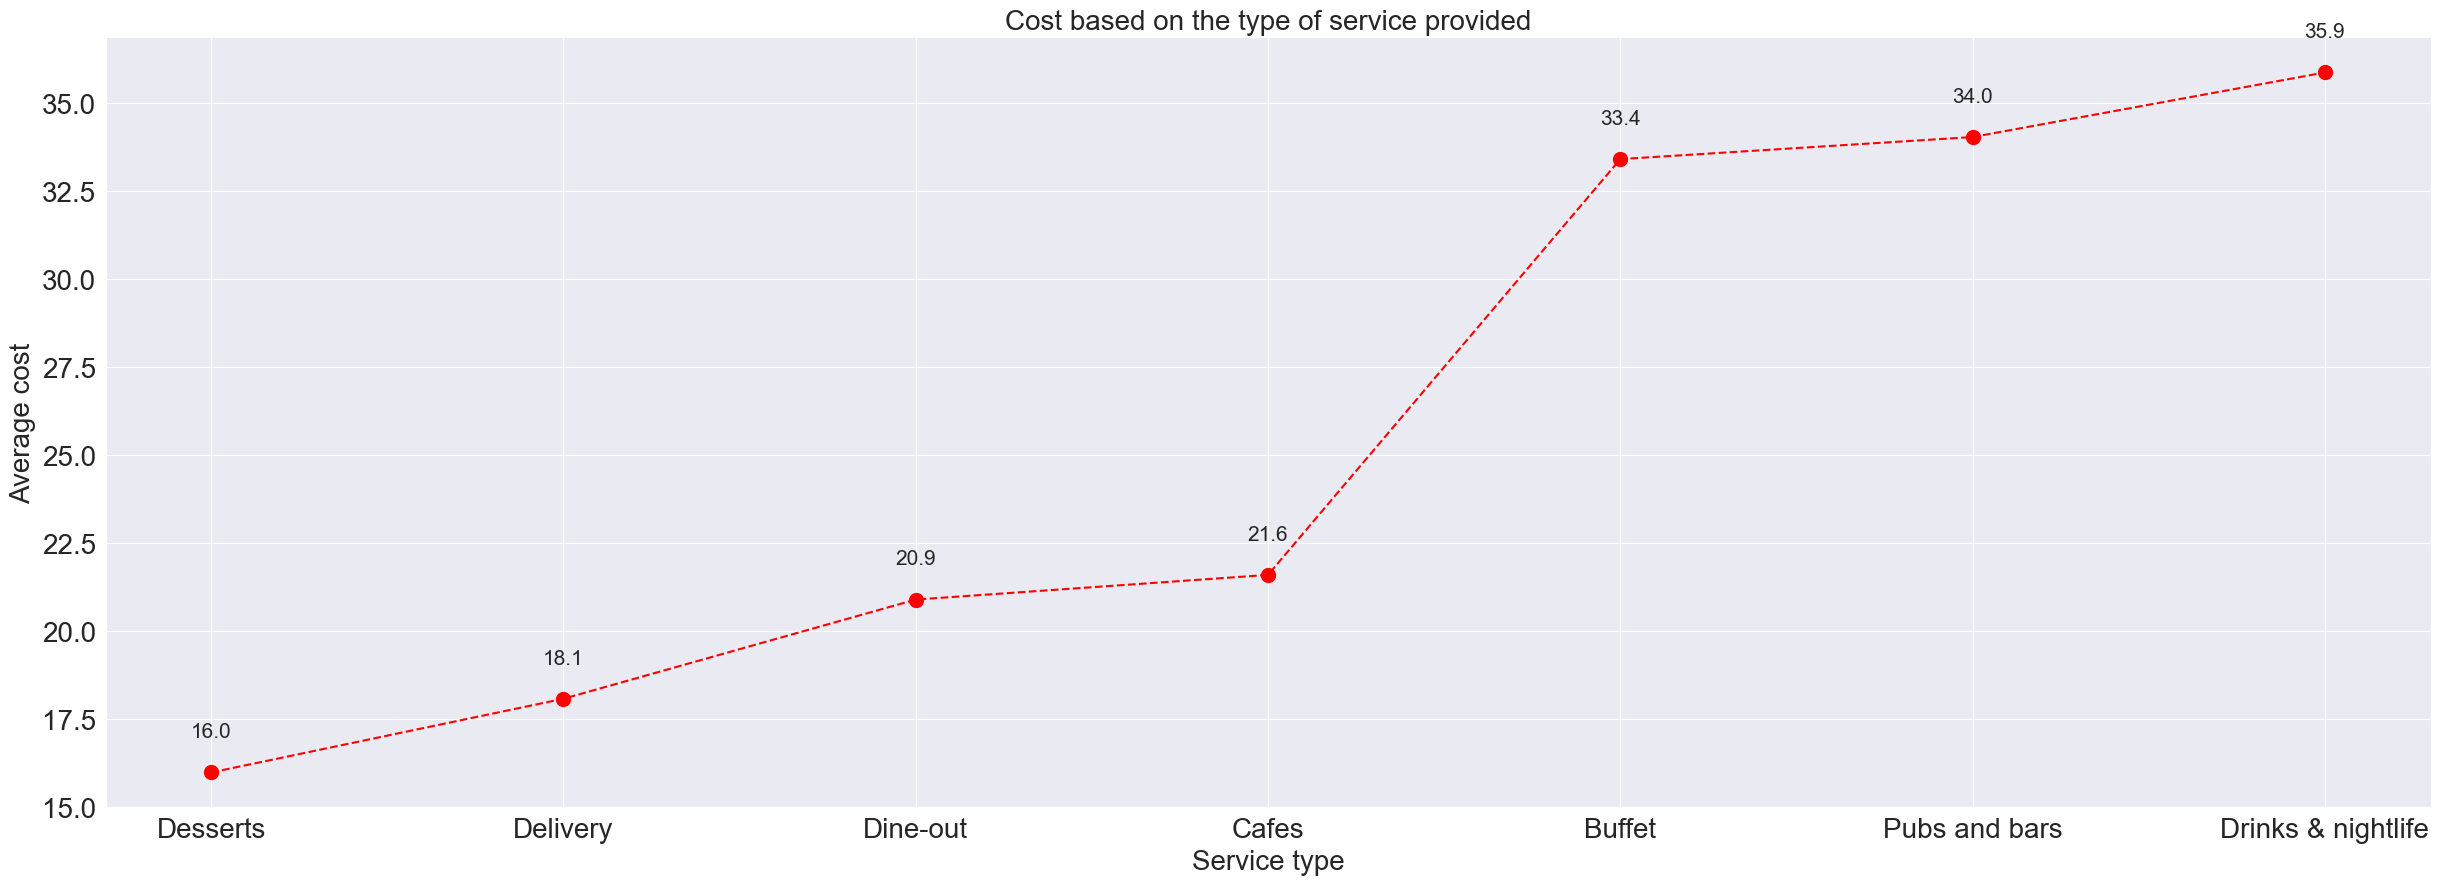

In [38]:
#What is the average price for two people based on the type of service?
d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

desserts were the least expensive type of food and buffets and drinks cost more than Rs.1300 for two people.

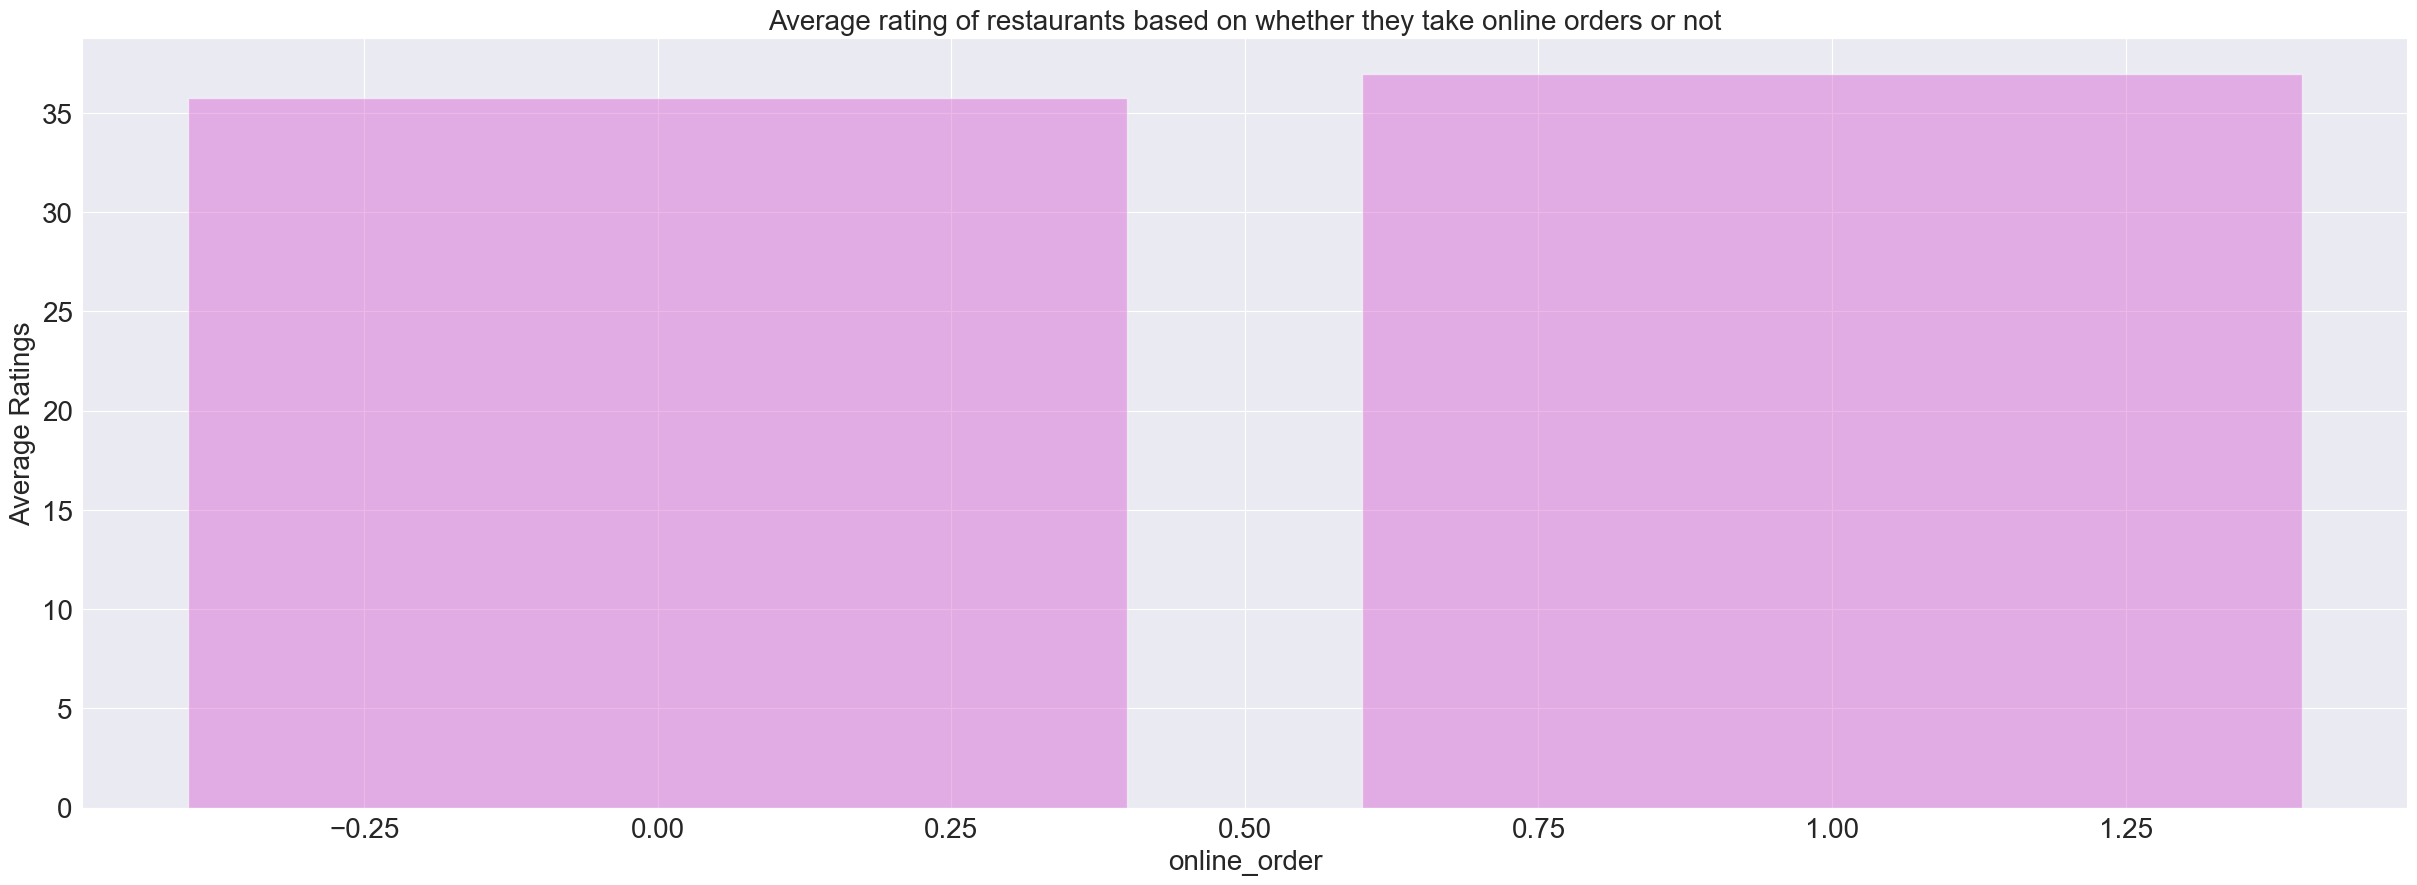

In [39]:
#Does the restaurant’s rating depend on whether it accepts online orders or not?
grp1=df.groupby('online_order')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['online_order'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('online_order',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

In [40]:
#What are the top 10 highest-rated restaurants?
grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

                                Name    Ratings
4886                Sant Spa Cuisine  61.000000
420   Asia Kitchen By Mainland China  60.631579
943      Byg Brewski Brewing Company  60.500000
4445                    Punjab Grill  60.285714
624           Belgian Waffle Factory  59.379310
4102                 OG Variar  Sons  59.000000
1977                        Flechazo  58.666667
5979                The Pizza Bakery  58.500000
88           ABs  Absolute Barbecues  58.210526
703                       Biergarten  58.200000


These restaurants receive the highest ratings from customers.

C:\Users\Viraj Walanj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


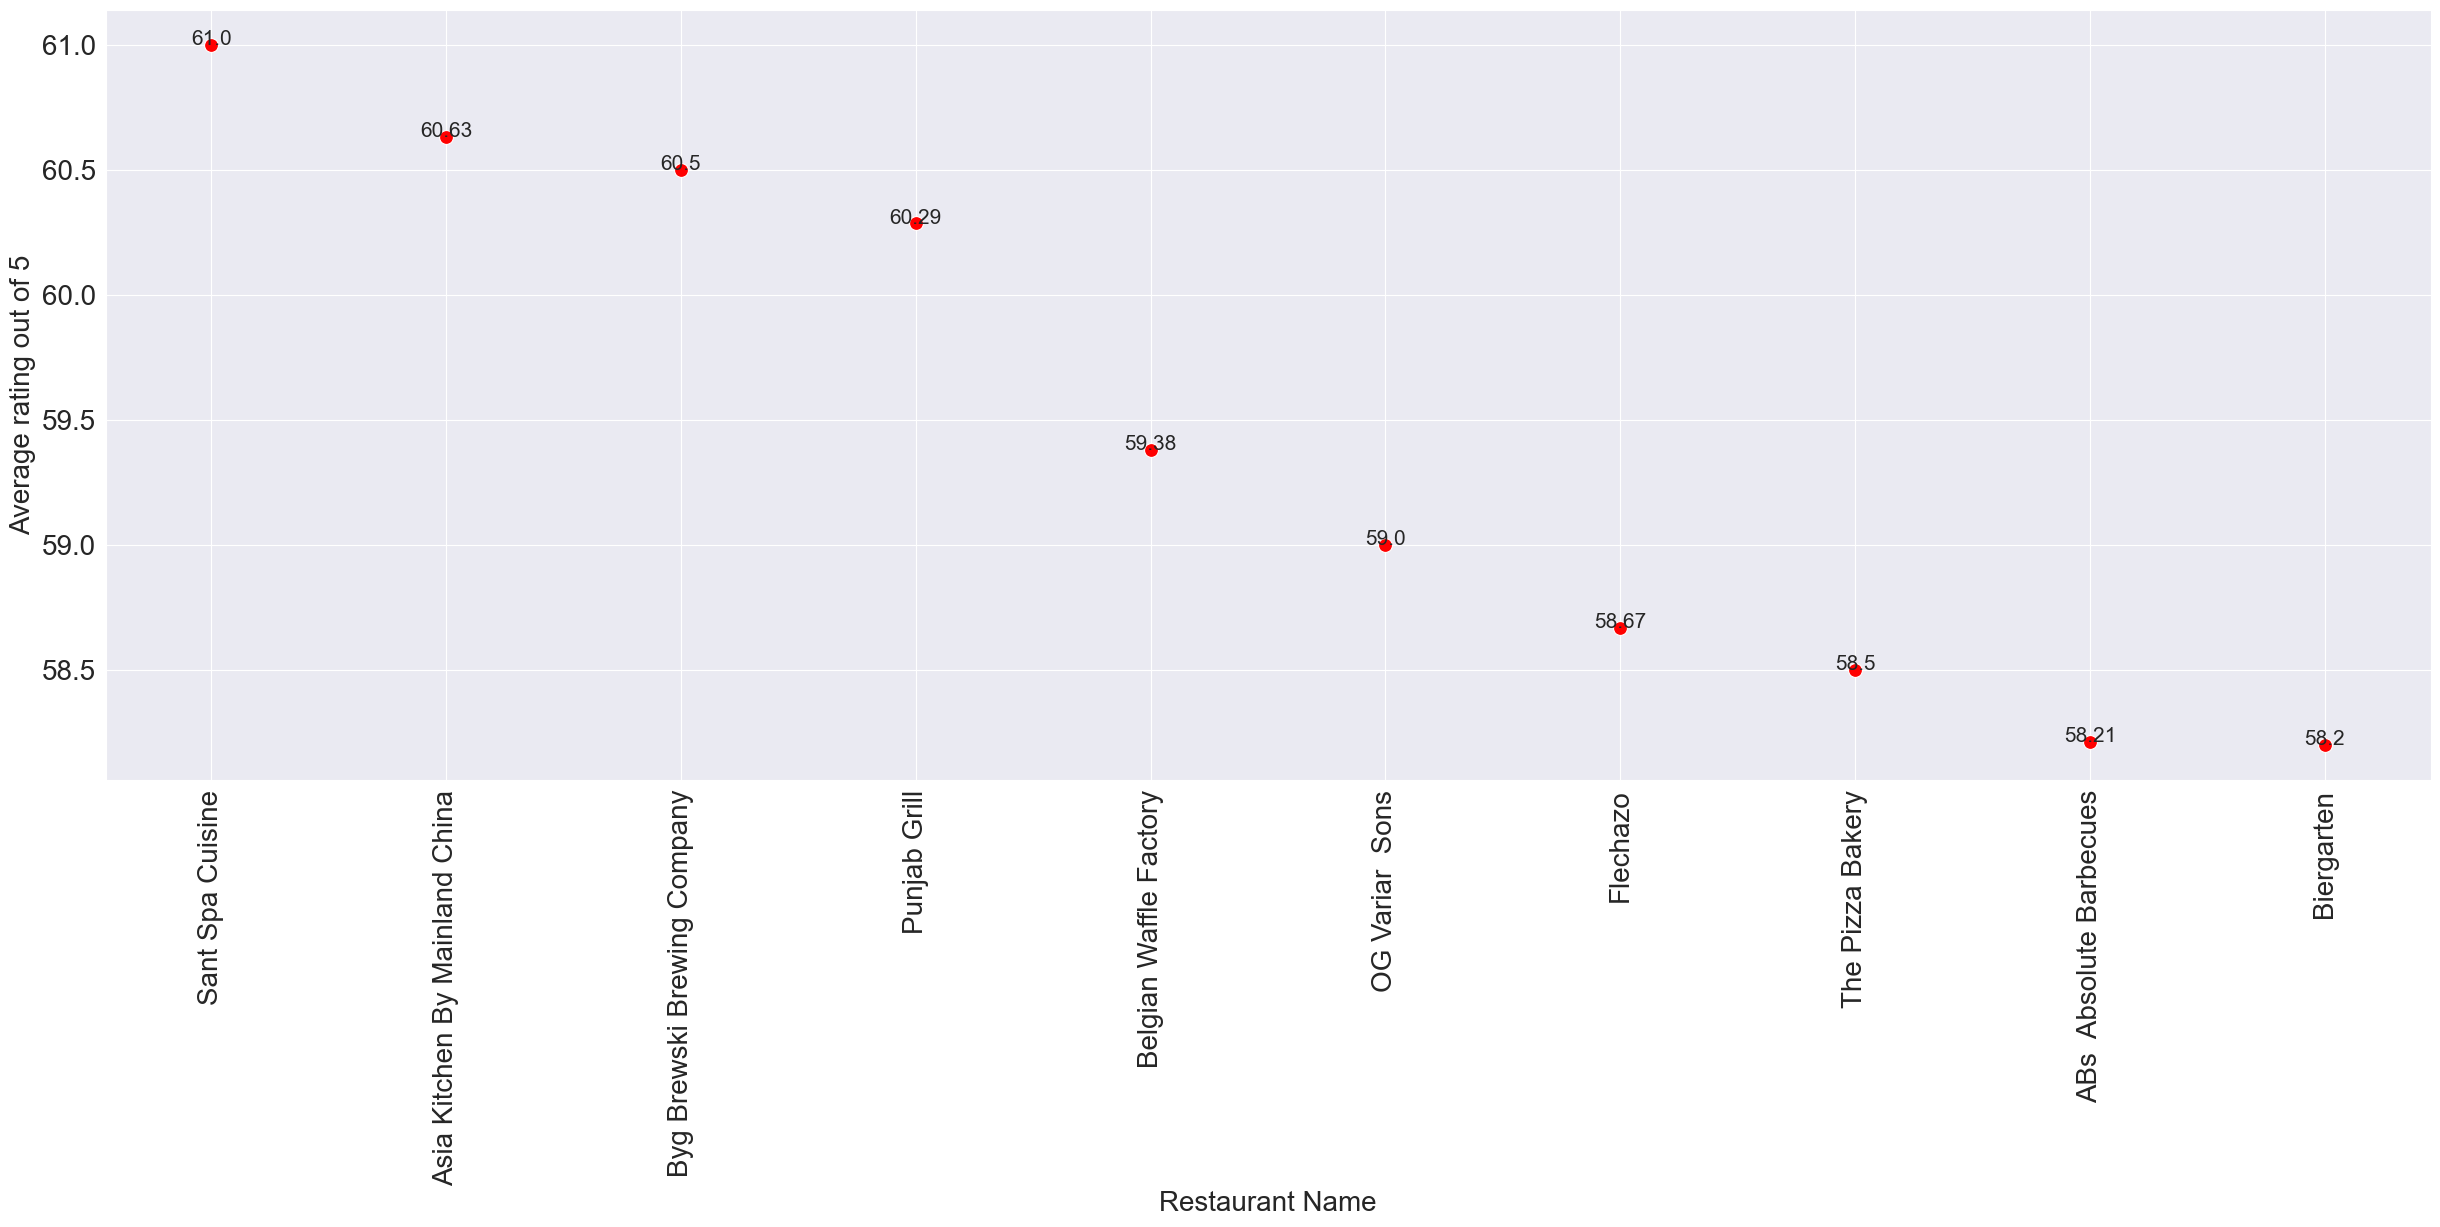

In [41]:
plt.figure(figsize=(30,10))
sns.scatterplot(grp2.Name,grp2.Ratings,s=100,color='red')
for i,e in enumerate(grp2.Ratings):
    plt.text(i,e,round(e,2),fontsize=15,horizontalalignment='center')
plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Average rating out of 5',size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()

# Machine Learning

In [42]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['Ratings', 'Cost', 'Votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df1 = Encode(df.copy())

In [43]:
df1.shape

(41190, 10)

In [44]:
df1

,Name,online_order,book_table,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,0,0,0,44,775,0,0,25,0,0
1,1,0,1,44,787,0,1,25,0,0
2,2,0,1,38,918,1,2,25,0,0
3,3,1,1,36,88,2,3,14,0,0
4,4,1,1,38,166,0,4,21,0,0
...,...,...,...,...,...,...,...,...,...,...
51709,2700,1,1,37,34,28,204,25,6,29
51711,1715,1,1,13,81,28,761,25,6,29
51712,6516,1,1,35,27,17,240,38,6,29
51715,6553,1,0,49,236,17,237,49,6,29


In [45]:
#Defining the independent variables and dependent variables
x = df1[['online_order', 'book_table', 'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City']]
y =df1['Ratings']

In [46]:
#Getting Test and Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

36661    29
13880    22
11862    40
38490    43
24585    48
Name: Ratings, dtype: int32

Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.30147966804131965

Logistics Regression

In [49]:
df1['target']=0 # declare a column named target

In [50]:
df1.head()

,Name,online_order,book_table,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City,target
0,0,0,0,44,775,0,0,25,0,0,0
1,1,0,1,44,787,0,1,25,0,0,0
2,2,0,1,38,918,1,2,25,0,0,0
3,3,1,1,36,88,2,3,14,0,0,0
4,4,1,1,38,166,0,4,21,0,0,0


In [51]:
df1['target'][df1['Ratings']>=3.75]=1; # target is equal to 1 if the corresponding rate is >= 3.75
df1['target'][df1['Ratings']<3.75]=0; # target is equal to 0 if the corresponding rate is < 3.75

C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\1352058691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'][df1['Ratings']>=3.75]=1; # target is equal to 1 if the corresponding rate is >= 3.75
C:\Users\Viraj Walanj\AppData\Local\Temp\ipykernel_15164\1352058691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'][df1['Ratings']<3.75]=0; # target is equal to 0 if the corresponding rate is < 3.75


In [52]:
X = df1[['online_order', 'book_table','Ratings', 'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City']]
y3=df1['target']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y3_train,y3_test=train_test_split(X,y3,test_size=0.2,random_state=48)

In [91]:
X_train

,online_order,book_table,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
31689,0,0,45,2727,0,309,25,4,17
48566,0,0,45,637,0,901,31,4,27
12929,0,1,20,25,2,921,14,4,7
9157,0,1,34,11,15,364,10,2,6
119,1,1,24,30,17,78,29,2,0
...,...,...,...,...,...,...,...,...,...
29655,0,1,45,121,2,371,10,2,17
38010,0,1,25,13,2,932,16,2,20
11969,1,1,36,145,3,826,29,2,7
3279,1,1,36,26,9,69,14,3,2


In [92]:
X_test

,online_order,book_table,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
21724,0,1,23,260,2,5,13,4,12
5582,0,1,26,4,2,38,18,2,4
16714,0,1,28,8,2,33,14,2,10
4319,1,1,24,5,7,288,23,2,3
7360,0,1,38,39,2,370,14,2,5
...,...,...,...,...,...,...,...,...,...
21129,1,0,39,176,0,1854,35,4,12
12638,1,0,48,614,14,814,55,4,7
14286,0,1,24,273,2,1567,17,4,8
15832,1,1,12,113,4,10,20,1,10


In [93]:
y3_train

31689    1
48566    1
12929    1
9157     1
119      1
        ..
29655    1
38010    1
11969    1
3279     1
20004    1
Name: target, Length: 32952, dtype: int64

In [94]:
y3_test

21724    1
5582     1
16714    1
4319     1
7360     1
        ..
21129    1
12638    1
14286    1
15832    1
26837    1
Name: target, Length: 8238, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [96]:
lr =  LogisticRegression()
X_train.drop(['Ratings'],inplace=True,axis=1)
X_test.drop(['Ratings'],inplace=True,axis=1)
lr.fit(X_train,y3_train)
y3_pred=lr.predict(X_test) 

C:\Users\Viraj Walanj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
acc=accuracy_score(y3_test, y3_pred)

In [98]:
prec=precision_score(y3_test, y3_pred)

In [99]:
recall=recall_score(y3_test, y3_pred)

In [100]:
print("Accuracy:",acc *100,'%')
print("Precision:",prec *100,'%')
print("Recall:",recall *100,'%')

Accuracy: 99.92716678805536 %
Precision: 99.92716678805536 %
Recall: 100.0 %


Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y3_train)
y4_pred=rf.predict(X_test)

In [102]:
acc1=accuracy_score(y3_test, y4_pred)

In [103]:
prec1=precision_score(y3_test, y4_pred)

In [104]:
recall1=recall_score(y3_test, y4_pred)

In [105]:
print("Accuracy:",acc1 *100,'%')
print("Precision:",prec1 *100,'%')
print("Recall:",recall1 *100,'%')

Accuracy: 99.97572226268512 %
Precision: 99.97571046878795 %
Recall: 100.0 %
